# Sentiment Analysis of Cancun Beaches

Installing Transformers and dependencies

In [ ]:
!pip install transformers 

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification #Tokens
import torch # PyTorch

In [3]:
# For plots(histograms) and fix tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Organising the model with BERT

In [4]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [5]:
# an example of how the token works
tokens = tokenizer.encode('I hate this beach!', return_tensors='pt')

In [6]:
tokens

tensor([[  101,   151, 39487, 10372, 14575,   106,   102]])

In [7]:
result = model(tokens)

In [8]:
# Function that evaluates all reviews in data frames  
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

# Analysys of the reviews of 5 public beaches in Cancun(Mexico)

1. Playa Delfines

In [10]:
#df
delfines = pd.read_csv("deflines.csv")

In [11]:
delfines

,review
0,Sin duda la playa Delfines es un lugar que deb...
1,"Es la mejor playa de la zona, su vista es impr..."
2,Es una playa pública muy bonita.. Si estas can...
3,"Excelente playa, a pesar de ser pública es bas..."
4,En esta playa es donde acuden muchas personas ...
5,siempre hay mucha fila para tomar fotos en las...
6,Una playa que se encuentra a 20 min del centr...
7,"Hermoso lugar tiene sombra, salvavidas.Baños l..."
8,me encantan las olas de este lugar es un lugar...
9,Playa pública en donde se respira un ambiente ...


In [12]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
delfines['sentiment'] = delfines['review'].apply(lambda x: sentiment_score(x[:512]))

In [13]:
# Data Frame with a review and sentiment column
delfines

,review,sentiment
0,Sin duda la playa Delfines es un lugar que deb...,4
1,"Es la mejor playa de la zona, su vista es impr...",5
2,Es una playa pública muy bonita.. Si estas can...,4
3,"Excelente playa, a pesar de ser pública es bas...",5
4,En esta playa es donde acuden muchas personas ...,4
5,siempre hay mucha fila para tomar fotos en las...,5
6,Una playa que se encuentra a 20 min del centr...,4
7,"Hermoso lugar tiene sombra, salvavidas.Baños l...",5
8,me encantan las olas de este lugar es un lugar...,5
9,Playa pública en donde se respira un ambiente ...,4


In [14]:
# Summary 
delfines.describe()

,sentiment
count,20.000000
mean,4.100000
std,0.967906
min,2.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [15]:
# Counting the values
pd.value_counts(delfines["sentiment"])

4    8
5    8
3    2
2    2
Name: sentiment, dtype: int64

In [16]:
# Ploting a histogram
ydelfines = delfines["sentiment"].values

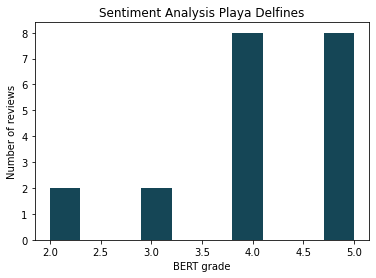

In [57]:
plt.hist(ydelfines, color = '#154656')
plt.title('Sentiment Analysis Playa Delfines')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('delfines.png', dpi=100)
plt.show()

2. Playa Langosta

In [18]:
#df
langosta = pd.read_csv("langosta.csv")

In [20]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
langosta['sentiment'] = langosta['review'].apply(lambda x: sentiment_score(x[:512]))

In [21]:
# Data Frame with a review and sentiment column
langosta

,review,sentiment
0,Llegar a esta playa es fácil por la ubicación ...,3
1,"Nos encanto la playa, súper limpia, poco oleaj...",5
2,"Fuimos un miércoles y había muy poca gente, el...",5
3,"Entrada gratuita y estacionamiento gratuito, h...",4
4,"Se llega tomando el Omnibus, R1 ó R2 que por $...",4
5,"Parece alberca, esta muy bajita, puedes meterm...",3
6,"La playa está muy limpia, la vista es agradab...",4
7,"Playa ideal para familias con niños pequeños, ...",5
8,"Linda, pero no es para nadar, es como un chapo...",3
9,Estábamos recorriendo las playas de Cancun y d...,5


In [22]:
# Summary 
langosta.describe()

,sentiment
count,21.000000
mean,3.714286
std,1.146423
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [24]:
# Counting the values
pd.value_counts(langosta["sentiment"])

4    9
3    5
5    5
1    2
Name: sentiment, dtype: int64

In [25]:
# Ploting a histogram
ylangosta = langosta["sentiment"].values

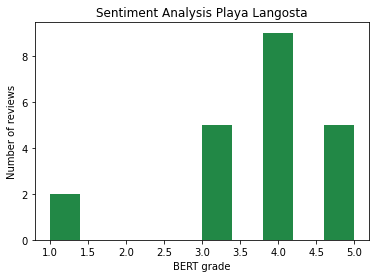

In [56]:
plt.hist(ylangosta, color = '#228846')
plt.title('Sentiment Analysis Playa Langosta')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('langosta.png', dpi=100)
plt.show()

3. Xcacel Beach

In [28]:
#df
xcacel = pd.read_csv("xcacel.csv")

In [29]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
xcacel['sentiment'] = xcacel['review'].apply(lambda x: sentiment_score(x[:512]))

In [30]:
# Data Frame with a review and sentiment column
xcacel

,review,sentiment
0,Antes el ingreso a esta playa era a voluntad. ...,3
1,"Que cosa de playa, es una alberca infinita, si...",2
2,Situado entre Tulum y Akumal. 12 km al sur de ...,5
3,"Es una playa bonita, vi mucho sargazo, podría...",4
4,Hermosa playa a unos 40 km de playa del Carmen...,5
5,Tenia buenas recomendaciones para conocer esta...,1
6,Xcacel es una playa muy bonita fui el año pasa...,5
7,"Lo pasamos genial , hicimos dos excursiones de...",5
8,Es una de las mejores playas no solo de MÉXICO...,5
9,Una maravilla de lugar mar abierto donde el me...,5


In [31]:
# Summary 
xcacel.describe()

,sentiment
count,20.000000
mean,3.550000
std,1.637553
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [32]:
# Counting the values
pd.value_counts(xcacel["sentiment"])

5    9
1    4
4    3
3    2
2    2
Name: sentiment, dtype: int64

In [33]:
# Ploting a histogram
yxcacel = xcacel["sentiment"].values

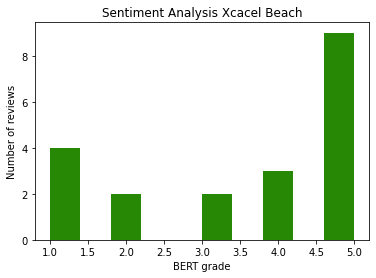

In [55]:
plt.hist(yxcacel, color = '#278806')
plt.title('Sentiment Analysis Xcacel Beach')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('xcacel.png', dpi=100)
plt.show()

4. Playa Caracol

In [35]:
#df
caracol = pd.read_csv("caracoles.csv")

In [36]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
caracol['sentiment'] = caracol['review'].apply(lambda x: sentiment_score(x[:512]))

In [37]:
# Data Frame with a review and sentiment column
caracol

,review,sentiment
0,"The touristy center of the region, with presti...",5
1,"You can go with family, couple or friends and ...",4
2,Playa Caracol is at the northern tip of Cancun...,4
3,"Cancun beaches like they said, its beautiful, ...",4
4,Totally average beach. Swamped with hawkers se...,1
5,What a lovely place to be at! Refreshing afte...,5
6,Small beach but close to the OXXO for beer etc...,4
7,We missed the Ultramar ($35 roundtrip pp) and ...,3
8,When you are at the beach you will be asked to...,5
9,We visit this beach and it’s quiet still water...,4


In [39]:
# Summary 
caracol.describe()

,sentiment
count,21.000000
mean,4.047619
std,1.203170
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [40]:
# Counting the values
pd.value_counts(caracol["sentiment"])

5    9
4    8
1    2
3    2
Name: sentiment, dtype: int64

In [41]:
# Ploting a histogram
ycaracol = caracol["sentiment"].values

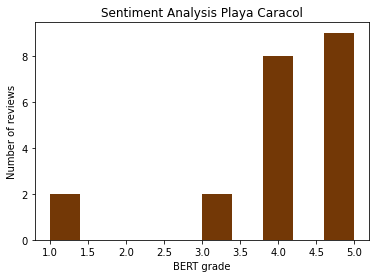

In [54]:
plt.hist(ycaracol, color = '#733806')
plt.title('Sentiment Analysis Playa Caracol')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('caracol.png', dpi=100)
plt.show()

5. Playa Tortugas

In [43]:
#df
tortugas = pd.read_csv("tortuga.csv")

In [44]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
tortugas['sentiment'] = tortugas['review'].apply(lambda x: sentiment_score(x[:512]))

In [45]:
# Data Frame with a review and sentiment column
tortugas

,review,sentiment
0,"Una gran playa pública con puerto marítimo, es...",5
1,El 31 de marzo de 2021 mi familia(6) y yo fuim...,1
2,"En sí la playa es muy bonita, y el mar es exce...",3
3,"Playa tortugas un lugar hermoso, pero lastima ...",2
4,"De ómnibus, tomando el R1 ó R2, Que por $12 Me...",4
5,Cancún tiene muchas playas hermosas con una gr...,4
6,Es una de las playas más lindas de Cancun. La ...,5
7,Visité Playa Tortugas en Diciembre con mi fami...,4
8,"La playa es pequeña, con oleaje muy leve, idea...",3
9,En parqueo venden el pase catamaran es estafa ...,1


In [46]:
# Summary 
tortugas.describe()

,sentiment
count,21.000000
mean,3.047619
std,1.687489
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [47]:
# Counting the values
pd.value_counts(tortugas["sentiment"])

1    7
5    6
4    4
3    3
2    1
Name: sentiment, dtype: int64

In [49]:
# Ploting a histogram
ytortugas = tortugas["sentiment"].values

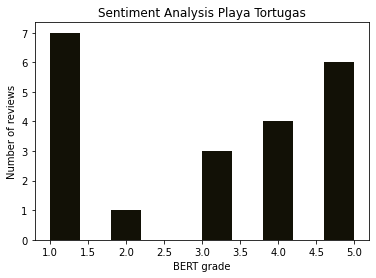

In [58]:
plt.hist(ytortugas, color = '#121106')
plt.title('Sentiment Analysis Playa Tortugas')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('tortugas.png', dpi=100)
plt.show()

# Analysis of Spanish-English reviews

In this repo I analized 10 spanish and 10 english reviews of a popular travel plataform which are considered to understand perceptions of local-latin visitors and other countries.

1. Spanish reviews

In [59]:
#df of spanish reviews
spanish = pd.read_csv("dfspanish.csv")

In [60]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
spanish['sentiment'] = spanish['review'].apply(lambda x: sentiment_score(x[:512]))

In [62]:
# Data Frame with a review and sentiment column
spanish.head()

,review,sentiment
0,Es una de las mejores playas públicas de Cancu...,5
1,No hay manera de describir las playas del cari...,5
2,"Atención muy buena, el personal es muy amable,...",5
3,"Hermosa playa ,.pero para disfrutarla aún mas ...",3
4,"Maravillosa y Sensacional playa, mar tranquil...",5


In [63]:
# Summary 
spanish.describe()

,sentiment
count,50.000000
mean,4.000000
std,1.228904
min,1.000000
25%,3.250000
50%,4.000000
75%,5.000000
max,5.000000


In [64]:
# Counting the values
pd.value_counts(spanish["sentiment"])

5    23
4    14
3     7
1     4
2     2
Name: sentiment, dtype: int64

In [65]:
# Ploting a histogram
yspanish = spanish["sentiment"].values

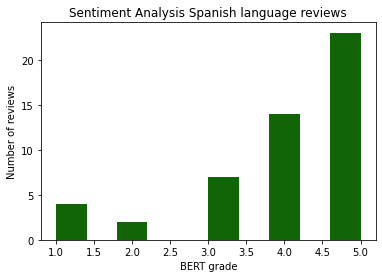

In [66]:
plt.hist(yspanish, color = '#126506')
plt.title('Sentiment Analysis Spanish language reviews')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('spanish.png', dpi=100)
plt.show()

2. English Reviews

In [67]:
#df of english reviews
english = pd.read_csv("dfenglish.csv")

In [68]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
english['sentiment'] = english['review'].apply(lambda x: sentiment_score(x[:512]))

In [69]:
# Data Frame with a review and sentiment column
english.head()

,review,sentiment
0,"The touristy center of the region, with presti...",5
1,"You can go with family, couple or friends and ...",4
2,Playa Caracol is at the northern tip of Cancun...,4
3,"Cancun beaches like they said, its beautiful, ...",4
4,Totally average beach. Swamped with hawkers se...,1


In [70]:
# Summary 
english.describe()

,sentiment
count,53.000000
mean,3.396226
std,1.472042
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [71]:
# Counting the values
pd.value_counts(english["sentiment"])

4    18
5    14
1    11
3     7
2     3
Name: sentiment, dtype: int64

In [72]:
# Ploting a histogram
yenglish = english["sentiment"].values

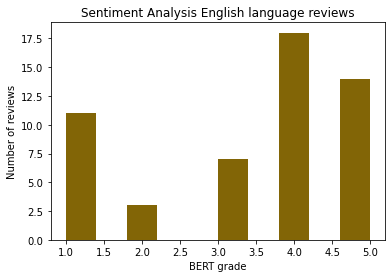

In [74]:
plt.hist(yenglish, color = '#826506')
plt.title('Sentiment Analysis English language reviews')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('english.png', dpi=100)
plt.show()

Comparing the results between english and spanish spoken visitors---> local and latin people have a better perception and understand more the context of the public beaches in Cancun, they gave them an overall of 4.0. In the other hand american and non spanish spoken have a mean of 3.39.   

# Concat english and spanish reviews

In [75]:
dfglobal = pd.concat([spanish,english], sort=False)

In [76]:
dfglobal

,review,sentiment
0,Es una de las mejores playas públicas de Cancu...,5
1,No hay manera de describir las playas del cari...,5
2,"Atención muy buena, el personal es muy amable,...",5
3,"Hermosa playa ,.pero para disfrutarla aún mas ...",3
4,"Maravillosa y Sensacional playa, mar tranquil...",5
...,...,...
48,This place is paradise! To get here you need t...,5
49,Our family (including kids 13 and 15) went to ...,4
50,We drove to Xcacel From Puerto Aventuras and w...,1
51,So my hubby and I love this beach. We’ve been ...,4


In [78]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
dfglobal['sentiment'] = dfglobal['review'].apply(lambda x: sentiment_score(x[:512]))

In [79]:
# Summary 
dfglobal.describe()

,sentiment
count,103.000000
mean,3.689320
std,1.386413
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [80]:
# Counting the values
pd.value_counts(dfglobal["sentiment"])

5    37
4    32
1    15
3    14
2     5
Name: sentiment, dtype: int64

In [81]:
# Ploting a histogram
ydfglobal = dfglobal["sentiment"].values

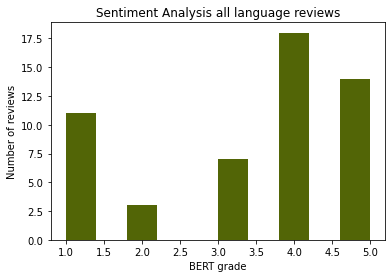

In [82]:
plt.hist(yenglish, color = '#526506')
plt.title('Sentiment Analysis all language reviews')
plt.xlabel('BERT grade')
plt.ylabel('Number of reviews')
plt.savefig('all.png', dpi=100)
plt.show()